<a href="https://colab.research.google.com/github/raziraz03/Final_ML/blob/main/foodranking_entri_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Asses the performance of Food in a Restaurant**

**Objective**

**The objective of this project is to evaluate user feedback across the 18,182 recipe reviews to assess the performance of dishes in the dataset, identify common user behaviors, and find the rating . Specifically, the analysis seeks to:**

     

*   Measure overall user satisfaction and engagement across recipes based on ratings and interaction metrics.

*  Find the best dish by analyzing the user input like thumpsup,thumps down,stars


    
    
    

**Below are the libraries used for the project**

**Plugins used till creating ML including graphical representation following plugins are used**


```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,zscore,boxcox
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,PowerTransformer
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
```

**Plugins used for ML algorithams and validation are**


```
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
```




In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,zscore,boxcox

from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,PowerTransformer,LabelEncoder,StandardScaler
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,IsolationForest
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import QuantileTransformer
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.compose import ColumnTransformer

**Loading Data**


Data can be loaded from different sources

*   pd.read_json('Recipedata.json', orient='records')
*   pd.read_csv('Recipedata.csv')
*   pd.read_sql(query, con, ...)
*   pd.read_excell(io, ...)
*   pd.read_pickle(filepath_or_buffer, ...)
*   pd.read_table(filepath_or_buffer, ...)
*   pd.read_html(io, ...)
*   pd.read_feather(filepath_or_buffer, ...)
*   pd.read_parquet(path, ...)
*   pd.read_hdf(path_or_buf, key, ...)

In [485]:
#loading data
data= pd.read_csv('Recipedata.csv')

**Starting EDA and Pre-Processing**

Here we start with .info to print the total number of column with what each  column is about like the datatype,notnull or not  etc..

In [486]:
#showing the datatype of each column
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB


Here .describe used to find out the advanced details of the table like mean,median,count quantile range thiss whill help us to find out how the data is dealing  like outliers etc..

In [487]:
#descriptive statistics
data.describe()

,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,18182.000000,18182.000000,18182.000000,18182.000000,1.818200e+04,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,121.465295,38.689363,21773.667253,2.159608,1.623710e+09,0.014630,1.089264,0.549335,4.288802,153.162138
std,116.747893,29.786647,23965.109637,10.014666,5.468697e+06,0.137974,4.201004,3.470124,1.544786,141.075316
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,150.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,520.000000,1.665756e+09,3.000000,106.000000,126.000000,5.000000,946.000000


In [488]:
data['created_at'] = pd.to_datetime(data['created_at'], unit='s') #converting timestamp to human readable

**printing the first 5 data from begining**

In [489]:
#displaying the first five data
data.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,2022-10-13 00:11:29,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,2022-10-09 01:08:07,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,2022-09-28 22:35:57,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,2022-08-29 15:43:28,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,2022-10-04 20:03:43,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


printing the last 5 data from dataset

In [490]:
#displaying the last 5 data
data.tail()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,2021-06-03 10:59:37,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,2021-02-11 09:45:20,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,2021-06-03 10:57:24,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,2021-06-03 10:47:13,0,0,0,5,100,I just made this too. It is wonderful. As fo...
18181,118,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_262637,u_1oKW6W12cOLxiMzjA7j8nTqwFWG,nopalito,1,2021-06-03 10:53:45,0,1,0,5,193,"OMG, you must make this cake. I made it for my..."


Displaying the total number of columns and rows

In [491]:
#for showing the total number of columns and rows
data.shape

(18182, 15)

In [492]:
#for calclulating the total number of null values in a dataset
data.isnull().sum()

,0
Unnamed: 0,0
recipe_number,0
recipe_code,0
recipe_name,0
comment_id,0
user_id,0
user_name,0
user_reputation,0
created_at,0
reply_count,0


In [493]:
#removing the null value from the dataset since only 2 values are null we are not going to use that column in future
data.dropna(inplace=True)

In [494]:
data.isnull().sum()

,0
Unnamed: 0,0
recipe_number,0
recipe_code,0
recipe_name,0
comment_id,0
user_id,0
user_name,0
user_reputation,0
created_at,0
reply_count,0


In [495]:
#checking for duplicate value in the dataset
data.duplicated().sum()

np.int64(0)

In [496]:
# data['stars'] = data['stars'].astype(int)

# ***Stepping into Data Formating  and outlier handling***

In [497]:
#for listing the numeric data from data
datainteger = data.select_dtypes(include=['number']).columns

In [498]:
#forlisting the date and time column
datetime = data.select_dtypes(include=['datetime64[ns]']).columns

In [499]:
#forlisitng the object column
datachar = data.select_dtypes(include=['object']).columns

In [500]:
#for listing the skewness of the data
data[datainteger].skew()

,0
Unnamed: 0,2.112885
recipe_number,0.458756
recipe_code,3.443614
user_reputation,33.716657
reply_count,11.282445
thumbs_up,8.413665
thumbs_down,17.889305
stars,-2.128418
best_score,3.402349


drawing the histogram to show how the skewness is left skewed ,right skewed etc.. can be known form here




Text(0.5, 0, 'Histogram')

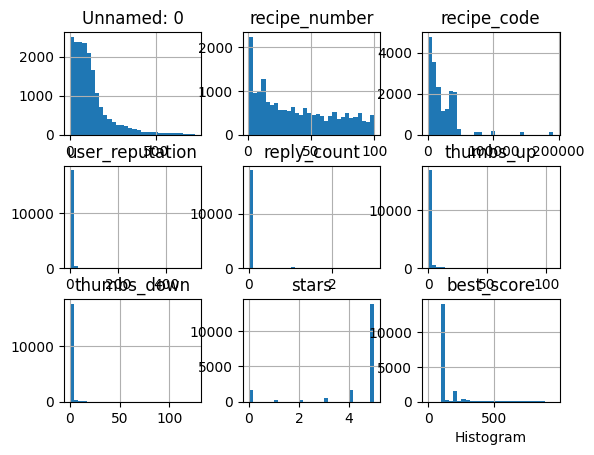

In [501]:
#checking the data with boxplot and histogram
data[datainteger].hist(bins=30)
plt.xlabel("Histogram")

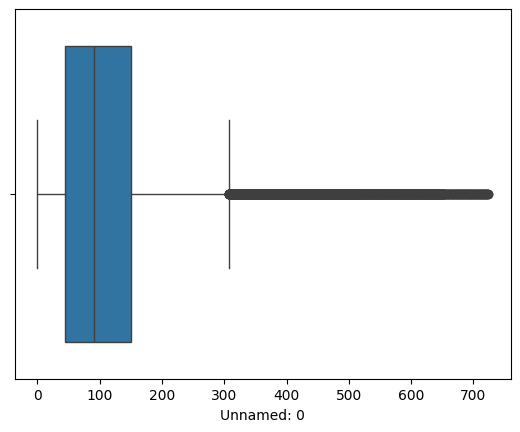

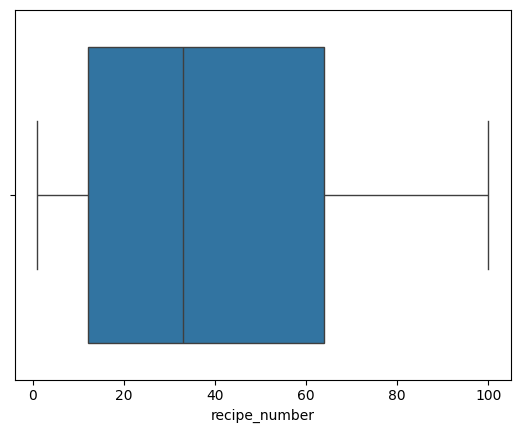

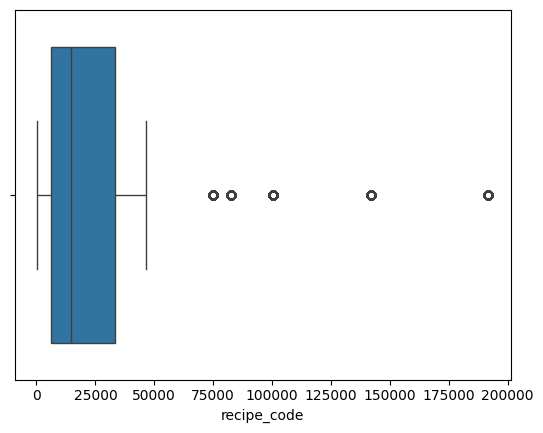

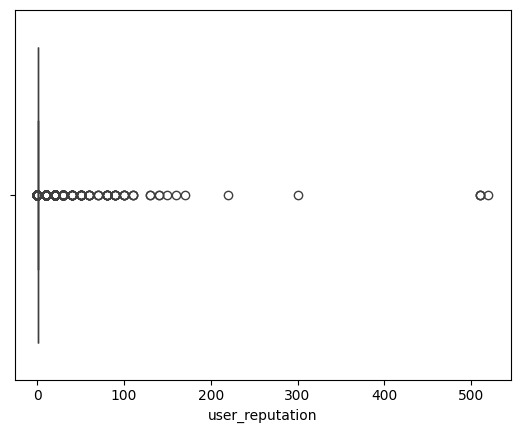

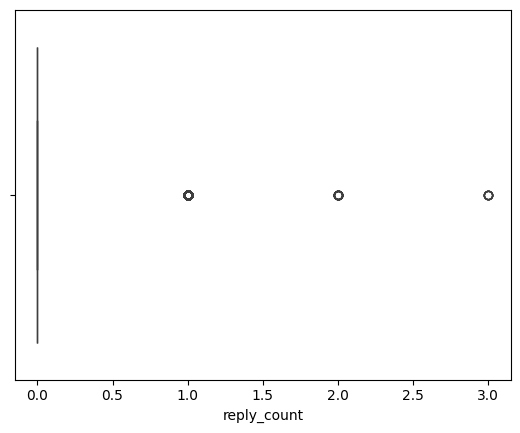

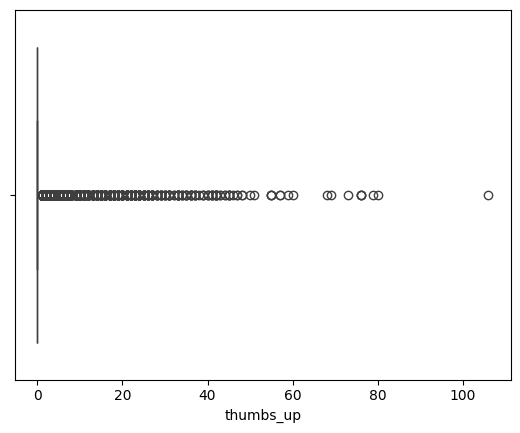

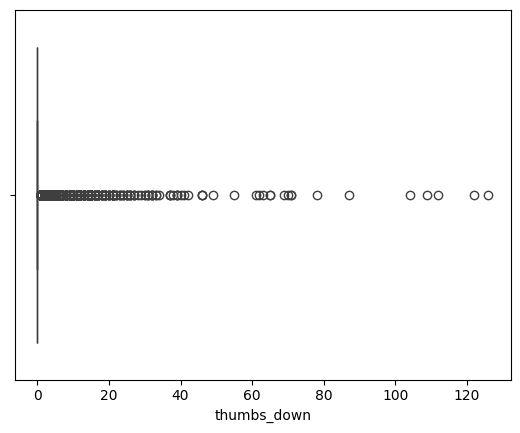

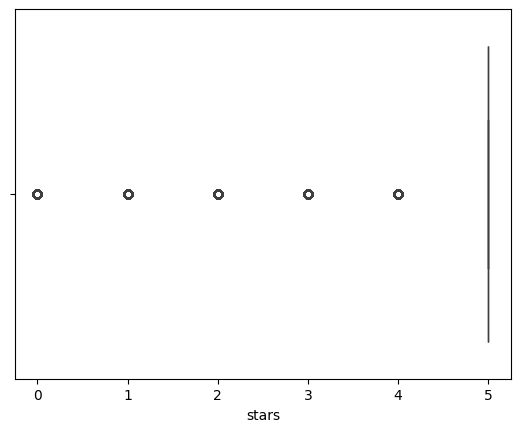

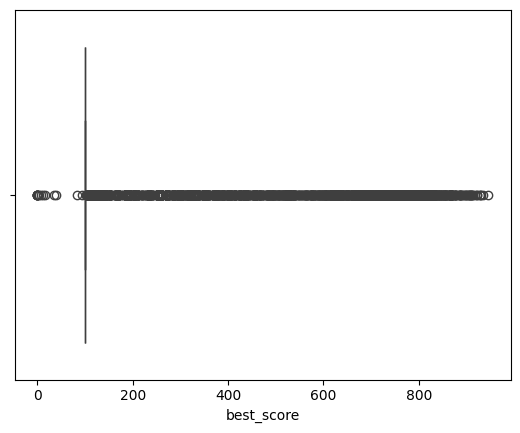

In [502]:
#showing boxplot using seaborn
for i in data[datainteger].columns:
  sns.boxplot(data=data[datainteger],x=i)
  plt.show()

**EDA process**

In [503]:
print(data['user_reputation'].value_counts())

user_reputation
1      16934
10       657
20       285
0        151
30        74
50        18
40        15
80         9
90         7
60         6
100        5
510        3
110        3
70         3
140        2
130        2
160        1
300        1
220        1
170        1
520        1
150        1
Name: count, dtype: int64


In [504]:
print(data['thumbs_down'].value_counts())

thumbs_down
0      15784
1       1198
2        388
3        184
4        113
5        102
6         68
7         46
9         35
8         30
10        26
11        24
13        21
12        19
15        18
14        15
21        10
16         9
19         7
17         7
18         6
20         5
32         4
26         4
25         4
23         3
22         3
24         3
27         3
39         3
37         3
46         3
31         3
30         2
65         2
71         2
33         2
29         1
61         1
41         1
34         1
109        1
42         1
122        1
112        1
62         1
38         1
63         1
78         1
70         1
69         1
55         1
104        1
28         1
87         1
49         1
40         1
126        1
Name: count, dtype: int64


In [505]:
#removing the 'Unnamed: 0','recipe_code','recipe_number' column these all are unique identifier whihc is not going to give any kind of metrics for the data also we ar replacing the best_score since its not proper and bringing in a new target column as engaged.ALso removing of reply_count is needed since 98% data is not having reply which is making high noice in dataset

data = data.drop(columns=['Unnamed: 0','recipe_code','recipe_number','best_score','reply_count'], errors='ignore')
datainteger = data.select_dtypes(include=['number']).columns


In [506]:
#checking negative values in stars
data[datainteger]['stars'] = data[datainteger]['stars'] .apply(lambda x: np.nan if x < 0 else x)
data[datainteger]['stars'] .fillna(data[datainteger]['stars'] .median(), inplace=True)


In [507]:
# since the data is becoming flat converted to binary
data['thumbs_down'] = data['thumbs_down'].apply(lambda x: 1 if x > 0 else 0)

### **Transformation and outlier handling starts here**

Applying Winsorization to handle outliers

In [508]:
def winsorize_df(df, cols, lower_quantile=0.05, upper_quantile=0.95):
    df_winsorized = df.copy()
    for col in cols:
        if df_winsorized[col].nunique() <= 1:
            continue
        lower = df_winsorized[col].quantile(lower_quantile)
        upper = df_winsorized[col].quantile(upper_quantile)
        df_winsorized[col] = df_winsorized[col].clip(lower, upper)
    return df_winsorized

Boxcox a trasformation method to be applied in positive values  only

In [509]:
def apply_boxcox(df, columns):
    df_transformed = df.copy()

    # Replace 0 or negative values with the median of positive values
    for col in columns:
        median_val = df_transformed[col][df_transformed[col] > 0].median()
        df_transformed[col] = df_transformed[col].apply(lambda x: median_val if x <= 0 else x)

    # Box-Cox transformation
    pt = PowerTransformer(method='box-cox', standardize=True)
    df_transformed[columns] = pt.fit_transform(df_transformed[columns])

    return df_transformed



sqrt tranformation method usd to handle skewness

In [510]:
def sqrtfunc(df, columns):
    df_sqrt = df.copy()
    for col in columns:
        # Convert to numeric, coerce errors to NaN
        df_sqrt[col] = pd.to_numeric(df_sqrt[col], errors='coerce')

        # Replace negative values with median of non-negative values
        non_neg_median = df_sqrt[col][df_sqrt[col] >= 0].median()
        df_sqrt[col] = df_sqrt[col].apply(
            lambda x: non_neg_median if pd.notnull(x) and x < 0 else x
        )

        # Fill NaNs (from conversion) with median or 0 if you prefer
        df_sqrt[col].fillna(non_neg_median, inplace=True)

        # Apply sqrt
        df_sqrt[col] = np.sqrt(df_sqrt[col])

    return df_sqrt


yeo-johnson is ued as power tranformation method to handle the skewness of the data that can handle both positive and negative values unlike some of the other tranformers

In [511]:
def apply_yeo_johnson(df, columns):
    df_transformed = df.copy()
    pt = PowerTransformer(method='yeo-johnson', standardize=True)

    df_transformed[columns] = pt.fit_transform(df[columns])

    return df_transformed

In [512]:
data[datainteger].skew()

,0
user_reputation,33.716657
thumbs_up,8.413665
thumbs_down,2.177206
stars,-2.128418


In [513]:
data[datainteger].shape

(18180, 4)

In [514]:
data.loc[:, 'user_reputation'] = np.log1p(data['user_reputation'])
data[datainteger].skew()

,0
user_reputation,4.213437
thumbs_up,8.413665
thumbs_down,2.177206
stars,-2.128418


In [515]:
#executing  winsorization happends here
cols_to_winsorize = ['thumbs_up']
df_cleaned = winsorize_df(data[datainteger], cols_to_winsorize)
data[datainteger]=df_cleaned

data[datainteger].skew()

,0
user_reputation,4.213437
thumbs_up,2.670041
thumbs_down,2.177206
stars,-2.128418


In [516]:
#for executing yeo-jhonson
yeo_columns = ['thumbs_up']
df_transformed = apply_yeo_johnson(data[datainteger], yeo_columns)
data[datainteger]=df_transformed

data[datainteger].skew()

,0
user_reputation,4.213437
thumbs_up,1.333105
thumbs_down,2.177206
stars,-2.128418


In [517]:
data[datainteger].shape

(18180, 4)

In [518]:
#executing  sqrt happends here
# sqrt_columns = ['thumbs_down']
# df_sqrt = sqrtfunc(data[datainteger], sqrt_columns)
# data[datainteger]=df_sqrt
# data[datainteger].skew()

In [519]:
data.loc[:, 'user_reputation'] = np.cbrt(data[datainteger]['user_reputation'])

data[datainteger].skew()

,0
user_reputation,0.494919
thumbs_up,1.333105
thumbs_down,2.177206
stars,-2.128418


In [520]:
# # Define the columns to transform using boxcox
columns_to_transform = ['thumbs_up']

# Apply Box-Cox transformation to the selected columns
data_box = apply_boxcox(data[datainteger], columns_to_transform)

data[datainteger]=data_box
data[datainteger].skew()

# Check the transformed data
# print(data[columns_to_transform].head())

,0
user_reputation,0.494919
thumbs_up,0.207290
thumbs_down,2.177206
stars,-2.128418


In [521]:
data[datainteger].head()

,user_reputation,thumbs_up,thumbs_down,stars
0,0.884997,-0.004973,0,5
1,1.578331,2.623251,0,5
2,1.338474,1.484068,0,5
3,0.884997,-0.004973,0,0
4,1.338474,2.623251,0,0


In [522]:
data[datainteger].tail()

,user_reputation,thumbs_up,thumbs_down,stars
18177,0.884997,-0.004973,0,5
18178,0.884997,-0.004973,0,5
18179,0.884997,-0.004973,0,5
18180,0.884997,-0.004973,0,5
18181,0.884997,-2.240308,0,5


In [523]:
data[datainteger].isnull().sum()

,0
user_reputation,0
thumbs_up,0
thumbs_down,0
stars,0


### **Transformation and outlier handling ends here**

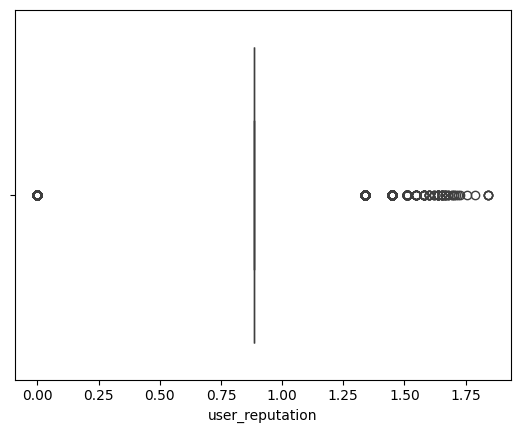

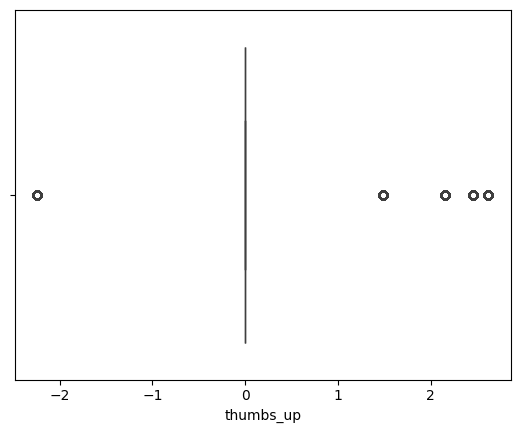

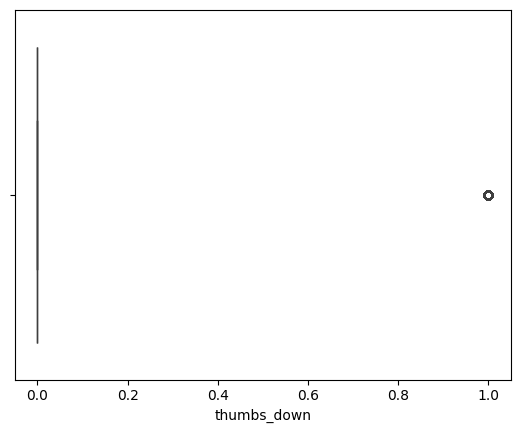

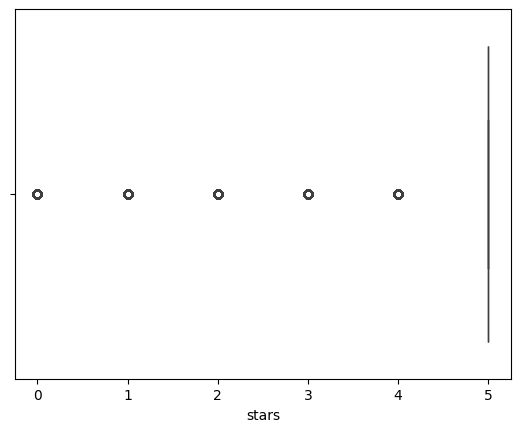

In [524]:
#showing boxplot using seaborn
for i in data[datainteger].columns:
  sns.boxplot(data=data[datainteger],x=i)
  plt.show()

In [525]:
data[datainteger].shape

(18180, 4)

In [526]:
stars_normalized = data[datainteger]['stars'] / 5
reputation=data[datainteger]['user_reputation']

# Log transform user_reputation (already handled if part of datainteger)
# reputation_log = np.log1p(data['user_reputation'])

# Create new column using transformed values from data[datainteger]
data['engaged'] = (
    (data['thumbs_up'] - data['thumbs_down']) +
    (0.5 * stars_normalized) +
    (0.2 * reputation)
)

# data['engaged'] =(
#     0.7 * stars_normalized +
#     0.3 * reputation)






# Clean up possible inf/-inf and NaNs
data['engaged'].replace([np.inf, -np.inf], np.nan, inplace=True)
data['engaged'].fillna(data['engaged'].mean(), inplace=True)

In [527]:
datainteger = data.select_dtypes(include='number').columns

Handling the skewness of the newly created column using yeo jhonson

In [528]:
# yeo_columns = ['engaged']
# df_transformed = apply_yeo_johnson(data[datainteger], yeo_columns)
# data[datainteger]=df_transformed

# data[datainteger].skew()

data['engaged'] = winsorize(data['engaged'], limits=[0.05, 0.05])

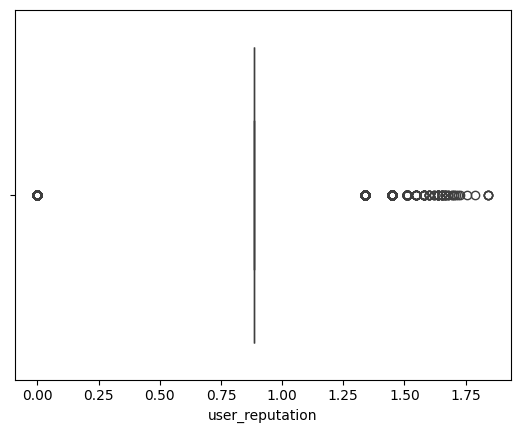

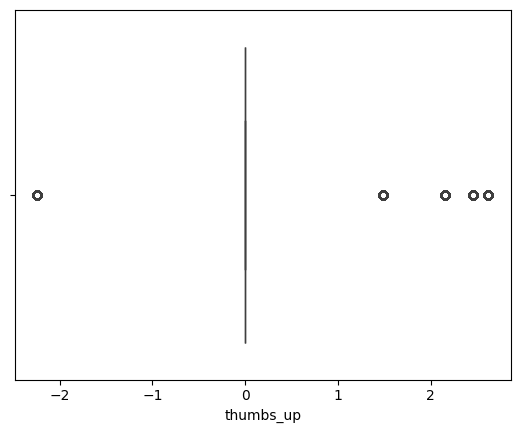

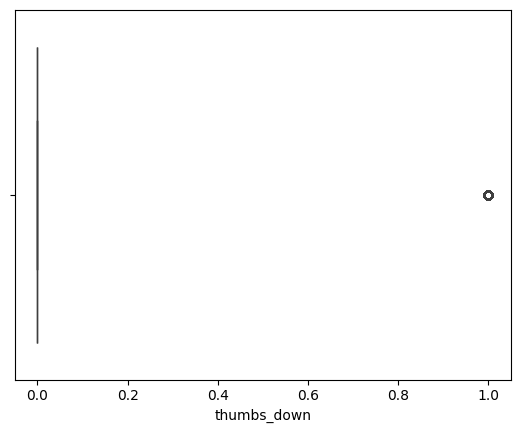

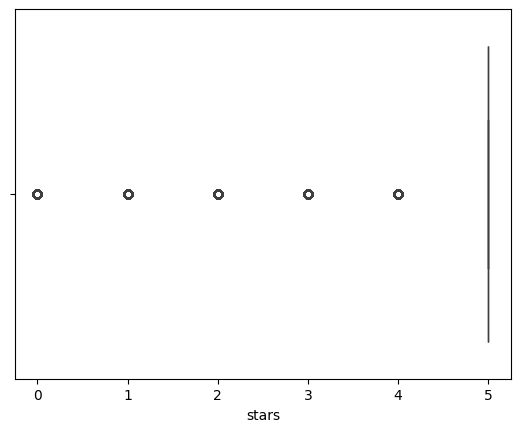

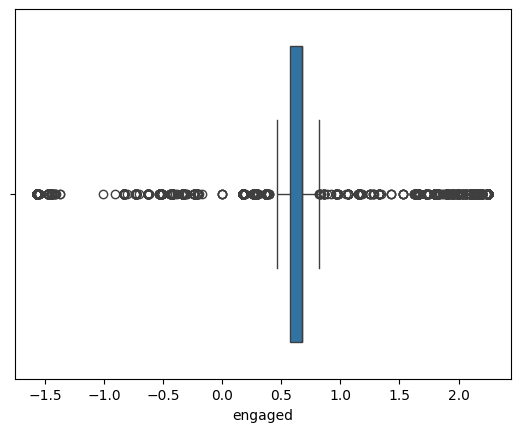

In [529]:
#showing boxplot using seaborn
for i in data[datainteger].columns:
  sns.boxplot(data=data[datainteger],x=i)
  plt.show()

In [530]:
data[datainteger].shape

(18180, 5)

In [531]:
data[datainteger].isnull().sum()

,0
user_reputation,0
thumbs_up,0
thumbs_down,0
stars,0
engaged,0


In [532]:
data[datainteger].skew()

,0
user_reputation,0.494919
thumbs_up,0.207290
thumbs_down,2.177206
stars,-2.128418
engaged,-0.759031


In [533]:
data[datainteger].describe()

,user_reputation,thumbs_up,thumbs_down,stars,engaged
count,18180.000000,1.818000e+04,18180.000000,18180.000000,18180.000000
mean,0.908650,-4.563029e-16,0.131793,4.288724,0.484900
std,0.149598,1.000028e+00,0.338275,1.544853,0.844992
min,0.000000,-2.240308e+00,0.000000,0.000000,-1.563309
25%,0.884997,-4.972843e-03,0.000000,5.000000,0.572027
50%,0.884997,-4.972843e-03,0.000000,5.000000,0.672027
75%,0.884997,-4.972843e-03,0.000000,5.000000,0.672027
max,1.842580,2.623251e+00,1.000000,5.000000,2.251763


Text(0.5, 0, 'Histogram')

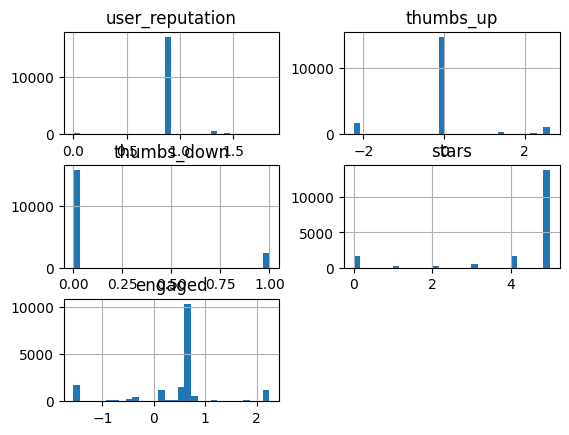

In [534]:
#checking the data with boxplot and histogram
data[datainteger].hist(bins=30)
plt.xlabel("Histogram")

<Axes: >

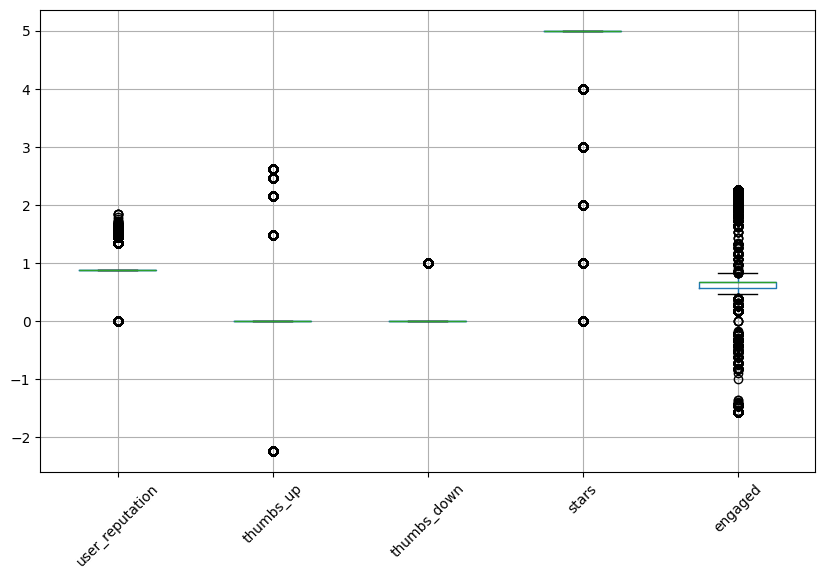

In [535]:
data[datainteger].boxplot(figsize = (10,6),rot = 45)

**Working with the Object Columns**

In [536]:
data[datachar].info()

<class 'pandas.core.frame.DataFrame'>
Index: 18180 entries, 0 to 18181
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   recipe_name  18180 non-null  object
 1   comment_id   18180 non-null  object
 2   user_id      18180 non-null  object
 3   user_name    18180 non-null  object
 4   text         18180 non-null  object
dtypes: object(5)
memory usage: 852.2+ KB


In [537]:
data[datachar].isnull().sum()

,0
recipe_name,0
comment_id,0
user_id,0
user_name,0
text,0


no duplicate values where found for duplicate values

In [538]:
data[datachar].duplicated().sum()

np.int64(0)

In [539]:
data[datachar].info()

<class 'pandas.core.frame.DataFrame'>
Index: 18180 entries, 0 to 18181
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   recipe_name  18180 non-null  object
 1   comment_id   18180 non-null  object
 2   user_id      18180 non-null  object
 3   user_name    18180 non-null  object
 4   text         18180 non-null  object
dtypes: object(5)
memory usage: 852.2+ KB


In [540]:
data = data.drop(columns=['comment_id', 'user_id', 'user_name', 'text'], errors='ignore')
datachar = data.select_dtypes(include=['object']).columns

In [541]:
data[datachar].shape
data[datachar].info()

<class 'pandas.core.frame.DataFrame'>
Index: 18180 entries, 0 to 18181
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   recipe_name  18180 non-null  object
dtypes: object(1)
memory usage: 284.1+ KB


In [542]:
le = LabelEncoder()
for col in datachar:
    data[col] = le.fit_transform(data[col].astype(str))
# instead of onehot encoding used label encoder since onehot encoding is giving more 103 etc column and since am using tree models.i am plaaning to use labelencoding
data[datachar].head()

,recipe_name
0,39
1,39
2,39
3,39
4,39


In [543]:
data[datachar].tail()

,recipe_name
18177,63
18178,63
18179,63
18180,63
18181,63


### **Feature Engineering for date and time**

In [544]:
data['year'] = data['created_at'].dt.year #dt is pandas date time accessor
data['month'] = data['created_at'].dt.month
data['day'] = data['created_at'].dt.day

In [545]:
#converting to int
# Total seconds since a reference date (useful for some models)
# data['created_at'] = data['created_at'].astype('int64')
datetime = ['year', 'month', 'day']  # exclude 'created_at'

In [546]:
Xconcat = pd.concat([data[datainteger], data[datachar],data[datetime]], axis=1)

In [547]:
Xconcat.isnull().sum()

,0
user_reputation,0
thumbs_up,0
thumbs_down,0
stars,0
engaged,0
recipe_name,0
year,0
month,0
day,0


In [548]:
y = Xconcat['engaged']
X = Xconcat.drop('engaged', axis=1)

In [549]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18180 entries, 0 to 18181
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_reputation  18180 non-null  float64
 1   thumbs_up        18180 non-null  float64
 2   thumbs_down      18180 non-null  int64  
 3   stars            18180 non-null  int64  
 4   recipe_name      18180 non-null  int64  
 5   year             18180 non-null  int32  
 6   month            18180 non-null  int32  
 7   day              18180 non-null  int32  
dtypes: float64(2), int32(3), int64(3)
memory usage: 1.0 MB


In [550]:
X.head()

,user_reputation,thumbs_up,thumbs_down,stars,recipe_name,year,month,day
0,0.884997,-0.004973,0,5,39,2022,10,13
1,1.578331,2.623251,0,5,39,2022,10,9
2,1.338474,1.484068,0,5,39,2022,9,28
3,0.884997,-0.004973,0,0,39,2022,8,29
4,1.338474,2.623251,0,0,39,2022,10,4


In [551]:
y.head()

,engaged
0,0.672027
1,2.251763
2,2.251763
3,0.172027
4,2.251763


In [552]:
y.isna().sum()

np.int64(0)

In [553]:
y.shape

(18180,)

In [554]:
X.shape

(18180, 8)

In [555]:
correlationdata=data[datainteger]
checkcorel=correlationdata.corr()
print(checkcorel)

                 user_reputation  thumbs_up  thumbs_down     stars   engaged
user_reputation         1.000000   0.005940    -0.000176  0.028226  0.035509
thumbs_up               0.005940   1.000000     0.308840 -0.028966  0.925637
thumbs_down            -0.000176   0.308840     1.000000 -0.132292  0.007844
stars                   0.028226  -0.028966    -0.132292  1.000000  0.169766
engaged                 0.035509   0.925637     0.007844  0.169766  1.000000


In [556]:
X.isnull().sum()

,0
user_reputation,0
thumbs_up,0
thumbs_down,0
stars,0
recipe_name,0
year,0
month,0
day,0


In [557]:
X.shape

(18180, 8)

In [558]:
X.describe()

,user_reputation,thumbs_up,thumbs_down,stars,recipe_name,year,month,day
count,18180.000000,1.818000e+04,18180.000000,18180.000000,18180.000000,18180.000000,18180.000000,18180.000000
mean,0.908650,-4.563029e-16,0.131793,4.288724,47.543234,2021.028713,6.009021,3.697470
std,0.149598,1.000028e+00,0.338275,1.544853,28.973563,0.167003,0.815391,3.557161
min,0.000000,-2.240308e+00,0.000000,0.000000,0.000000,2021.000000,1.000000,1.000000
25%,0.884997,-4.972843e-03,0.000000,5.000000,22.000000,2021.000000,6.000000,3.000000
50%,0.884997,-4.972843e-03,0.000000,5.000000,46.000000,2021.000000,6.000000,3.000000
75%,0.884997,-4.972843e-03,0.000000,5.000000,72.000000,2021.000000,6.000000,3.000000
max,1.842580,2.623251e+00,1.000000,5.000000,99.000000,2022.000000,12.000000,31.000000


### ***Graphical Area to see how the data is distributed***

<Axes: >

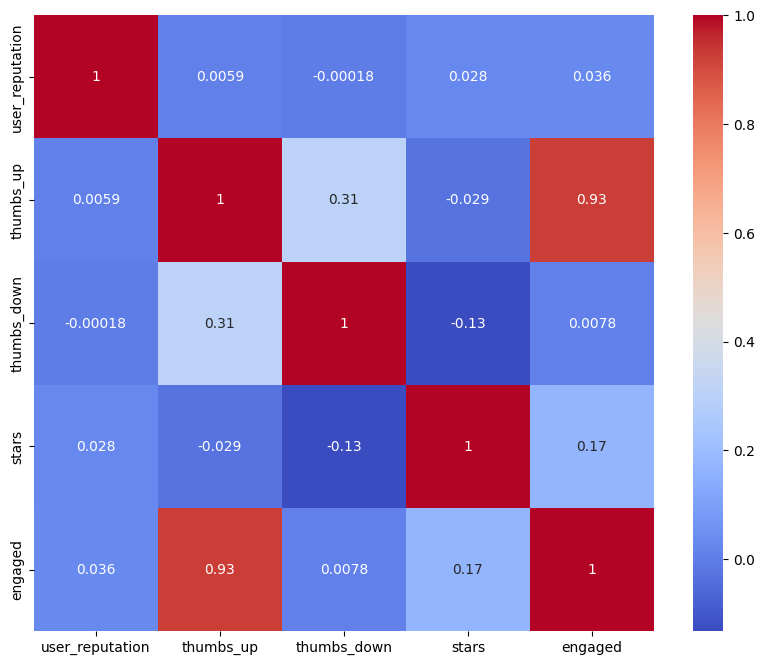

In [559]:
plt.figure(figsize=(10, 8))
sns.heatmap(checkcorel,annot=True, cmap="coolwarm")


**Checking the boxplot to see the distribution of data and outliers**

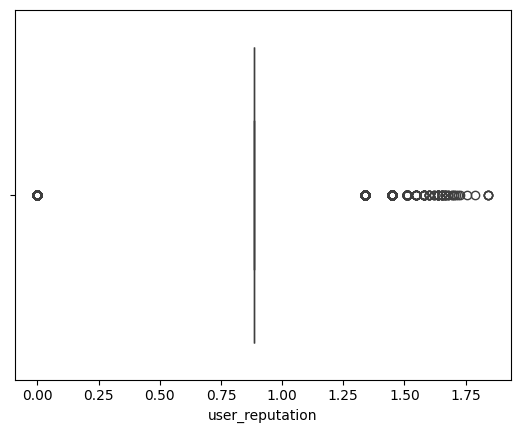

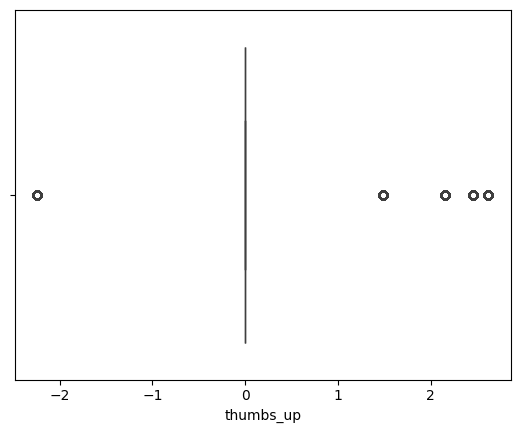

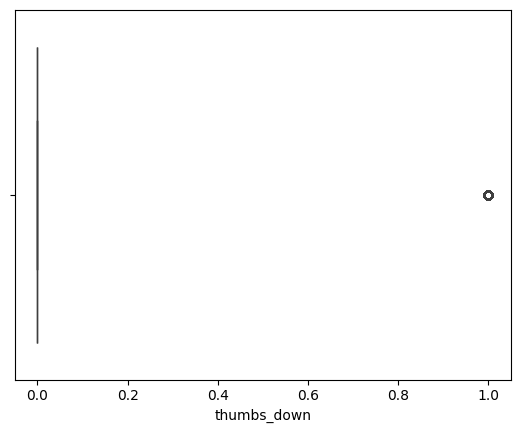

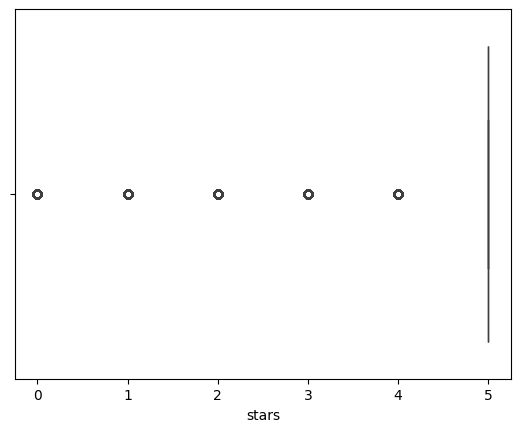

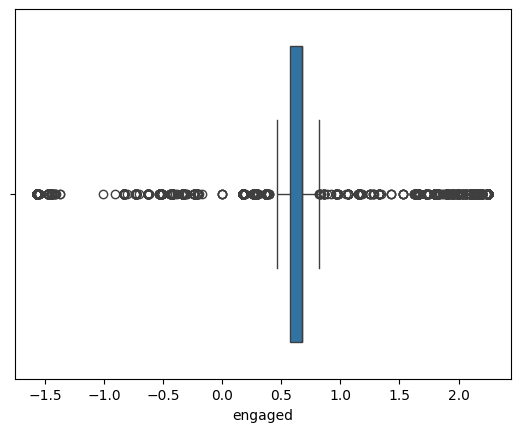

In [560]:
for i in data[datainteger].columns:
  sns.boxplot(data=data[datainteger],x=i)
  plt.show()

In [561]:
# select=SelectKBest(score_func=f_classif)
# X_new=select.fit_transform(X,y)
k_best = SelectKBest(score_func=f_regression, k='all')  # 'all' scores all features

# Fit the selector to the data
k_best.fit(X, y)

# Get feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': k_best.scores_
}).sort_values(by='Score', ascending=False)

# Display feature importance
print(feature_scores)

           Feature          Score
1        thumbs_up  108766.446608
7              day     944.591608
3            stars     539.446769
5             year     507.713491
6            month      33.644659
0  user_reputation      22.948746
4      recipe_name       3.334653
2      thumbs_down       1.118523


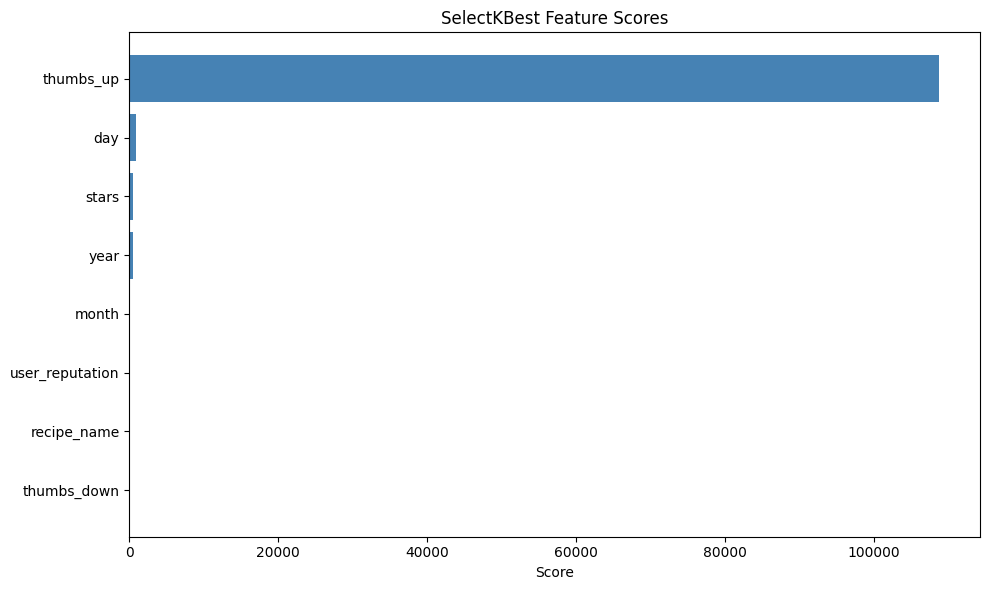

In [562]:
# Get scores and feature names
scores = k_best.scores_
features = X.columns

# Create DataFrame
feature_scores = pd.DataFrame({'Feature': features, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_scores['Feature'], feature_scores['Score'], color='steelblue')
plt.xlabel("Score")
plt.title("SelectKBest Feature Scores")
plt.gca().invert_yaxis()  # Highest score on top
plt.tight_layout()
plt.show()

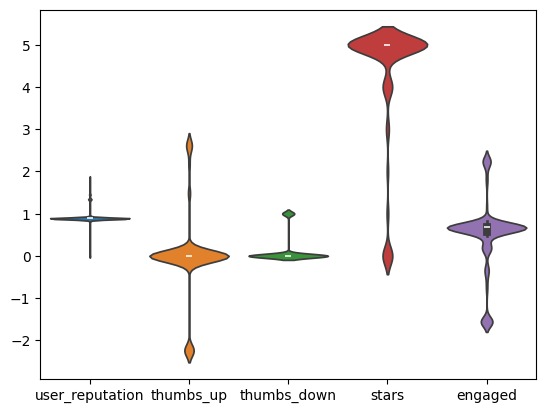

<Figure size 4000x1000 with 0 Axes>

In [563]:
sns.violinplot(data[datainteger])
plt.figure(figsize=(40,10))
plt.show()

Text(0.5, 0, 'Data')

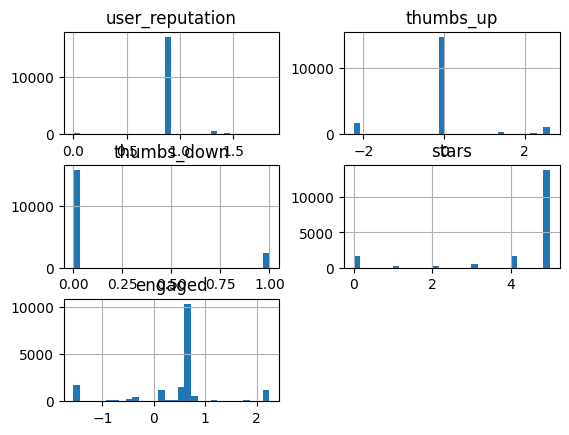

In [564]:
data[datainteger].hist(bins=30)
plt.xlabel("Data")

**Split Data into Training and Testing Sets:**

In [565]:
# null_engaged = data[data['engaged'].isna()]
# print(null_engaged[["thumbs_up", "thumbs_down", "stars", "user_reputation"]].isna().sum())

In [566]:
y.isnull().sum()

np.int64(0)

In [567]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Checking the shape of train and test data**

In [568]:
X_train.shape
X_test.shape
print(f"X train{X_train.shape}X_test{X_test.shape}y_train{y_train.shape}y_test{y_test.shape}")

X train(14544, 8)X_test(3636, 8)y_train(14544,)y_test(3636,)


**Implimenting Models**


* Linear Regression
                  Type: Parametric, Linear
                  Assumes: Linear relationship between input features and target

                  Strengths:

                  Fast and interpretable

                  Works well with normally distributed data

                  Weaknesses:

                  Struggles with complex patterns or non-linear data
* GradientBoostingRegressor

                  Type: Ensemble of Decision Trees (Boosting)

                  Strengths:

                  Often more accurate than Random Forests

                  Good with non-linear and noisy data

                  Weaknesses:

                  Sensitive to hyperparameters (e.g., learning rate)

                  Can overfit if not tuned properly
* RandomForestRegressor
                  Type: Ensemble of Decision Trees (Bagging)

                  Strengths:

                  Handles non-linear relationships well

                  Resistant to overfitting due to averaging

                  Handles missing values and categorical variables better

                  Weaknesses:

                  Slower training for large data

                  Less interpretable than linear models
* SVR
                  Type: Kernel-based, Non-linear capable

                  Strengths:

                  Good for small- to medium-sized datasets

                  Can model complex, high-dimensional patterns

                  Weaknesses:

                  Slow for large datasets

                  Requires feature scaling

                  Sensitive to kernel and hyperparameters


* DecisionTreeRegressor

                Type: Tree-based

                Strengths:

                Simple and interpretable

                Can capture non-linear patterns

                Weaknesses:

                Prone to overfitting

                Less stable (small changes in data = big changes in output)




In [569]:
models={'Linear Regression':LinearRegression(),
        'GradientBoostingRegressor':GradientBoostingRegressor(),
        'Random Foresr Regressor':RandomForestRegressor(),
        'SVR':SVR(),
        'DecisionTreeRegressor':DecisionTreeRegressor()}

# Train and evaluate models
results =[]

for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  mse=mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae=mean_absolute_error(y_test,y_pred)
  r2square=r2_score(y_test,y_pred)

  results.append({
            'Model': name,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2square
        })

resultdf = pd.DataFrame(results)
resultdf


,Model,MSE,RMSE,MAE,R²
0,Linear Regression,0.022184,0.148943,0.086226,0.968825
1,GradientBoostingRegressor,0.000336,0.018319,0.008238,0.999528
2,Random Foresr Regressor,0.000019,0.004391,0.000303,0.999973
3,SVR,0.708539,0.841748,0.480234,0.004304
4,DecisionTreeRegressor,0.000022,0.004652,0.000248,0.999970


**Choosing Random Forest Regressor alogortitham to create model**

In [570]:
# Assuming datainteger is a DataFrame
# This gets all column names from X (your feature set) as a list and stores it in datainteger_columns.
datainteger_columns = X.columns.tolist()

# ColumnTransformer lets you apply different transformations to different columns.

# StandardScaler() scales numeric columns to have mean = 0 and standard deviation = 1.

# You're scaling all columns listed in datainteger_columns + datetime.

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), datainteger_columns+datetime)  # scaling for numeric + datetime
    ]
)

# During .fit(), it first preprocesses data, then trains the regressor.

# During .predict(), it automatically applies the same preprocessing to new data before prediction.
performpipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Makes predictions on the test set.

# Computes R² score, which tells how well the predictions match the actual values.

# R² = 1: perfect prediction

# R² = 0: model is no better than predicting the mean

# Negative R²: worse than baseline

performpipeline.fit(X_train,y_train)
y_pred=performpipeline.predict(X_test)
r2squarefinal=r2_score(y_test,y_pred)


performpipeline


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['user_reputation',
                                                   'thumbs_up', 'thumbs_down',
                                                   'stars', 'recipe_name',
                                                   'year', 'month', 'day',
                                                   'year', 'month', 'day'])])),
                ('regressor', RandomForestRegressor())])

In [571]:
#user_reputation 	thumbs_up 	thumbs_down 	stars 	best_score 	recipe_name 	created_at
unseendata = pd.DataFrame({
    'user_reputation': [1, 50, 50, 1],
    'thumbs_up': [7, 3, 2, 1],
    'thumbs_down': [0, 3, 0, 0],
    'stars': [5, 5, 0, 5],
    'recipe_name': ['parotta', 'chapathi', 'chapathi', 'chapathi'],
    'created_at': [1622717844, 1622717844, 1622717844, 1622717844]
})

def encode_recipe_name(row):
    input_name = row['recipe_name']
    if input_name in le.classes_:
        return le.transform([input_name])[0]
    else:
        # Add unseen class temporarily to encoder
        le.classes_ = np.append(le.classes_, input_name)
        return le.transform([input_name])[0]

unseendata['recipe_name'] = unseendata.apply(encode_recipe_name, axis=1)


# Convert and extract datetime features
unseendata['created_at'] = pd.to_datetime(unseendata['created_at'], unit='s')
unseendata['year'] = unseendata['created_at'].dt.year
unseendata['month'] = unseendata['created_at'].dt.month
unseendata['day'] = unseendata['created_at'].dt.day

# Drop if not used in training
unseendata = unseendata.drop(columns=['created_at'])

unseen_pred = performpipeline.predict(unseendata)

In [572]:
# Save the Model
joblib.dump(performpipeline,'bes_gradboost.joblib')

new_data = [[14289, 7, 0, 5,'chapathi',1622717844]]  # 2D list
columns = ['user_reputation', 'thumbs_up', 'thumbs_down', 'stars', 'recipe_name','created_at']
new_data_df = pd.DataFrame(new_data, columns=columns)

# Handle 'recipe_name' (Label Encoding)
input_name = new_data_df.at[0, 'recipe_name']

if input_name in le.classes_:
    encoded_name = le.transform([input_name])[0]
else:
    # Add the unseen class temporarily to allow transform
    le.classes_ = np.append(le.classes_, input_name)
    encoded_name = le.transform([input_name])[0]  # This will now work

new_data_df['recipe_name'] = encoded_name


# Step 2: Convert 'created_at' to datetime and extract year/month/day
new_data_df['created_at'] = pd.to_datetime(new_data_df['created_at'], unit='s')
new_data_df['year'] = new_data_df['created_at'].dt.year
new_data_df['month'] = new_data_df['created_at'].dt.month
new_data_df['day'] = new_data_df['created_at'].dt.day

# Step 3: Drop 'created_at' if it wasn't used in training
new_data_df = new_data_df.drop(columns=['created_at'])

best_model = joblib.load('bes_gradboost.joblib')
predictions = best_model.predict(new_data_df)
print(predictions)


[2.25176288]
